--- Verificando archivos en 'datos/' ---
✅ brands.csv cargado.
✅ finance.csv cargado.
✅ reviews.csv cargado.
⚠️ traffic.csv NO encontrado (se omitirá).

🚀 Dataset final creado con 3120 filas.


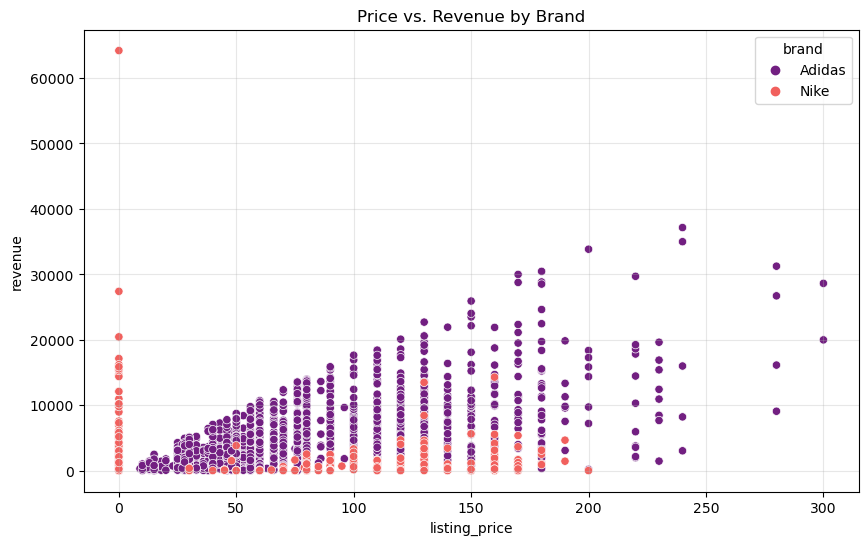

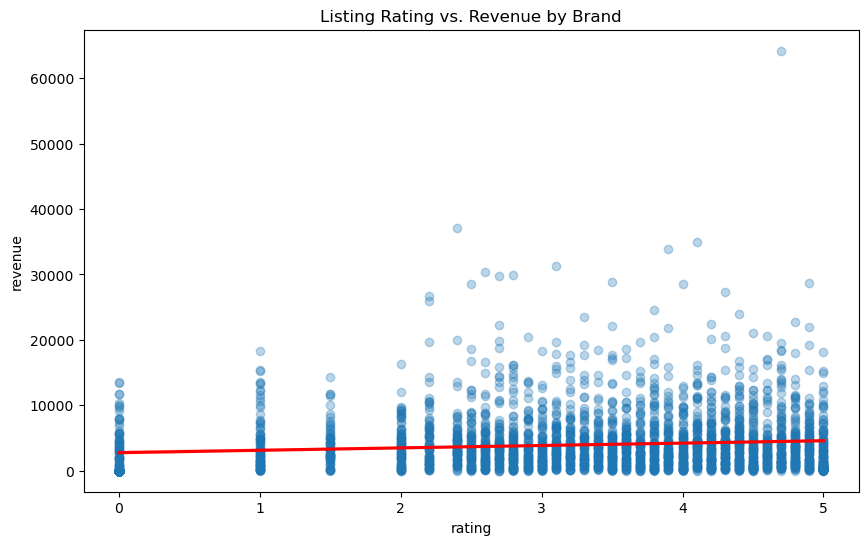

--- RESUMEN ESTRATÉGICO POR MARCA ---
            revenue    rating  cantidad_productos
brand                                            
Adidas  11526619.08  3.367184                2575
Nike      802283.26  2.786789                 545


OSError: Cannot save file into a non-existent directory: 'datos'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. LISTA DE ARCHIVOS Y CARGA SEGURA
archivos = ['brands.csv', 'finance.csv', 'reviews.csv', 'traffic.csv']
dataframes = {}

print("--- Verificando archivos en 'datos/' ---")
for arc in archivos:
    ruta = f'data/{arc}'
    if os.path.exists(ruta):
        dataframes[arc.replace('.csv', '')] = pd.read_csv(ruta)
        print(f"✅ {arc} cargado.")
    else:
        print(f"⚠️ {arc} NO encontrado (se omitirá).")

# 2. UNIÓN DINÁMICA (Merge)
# Intentamos unir al menos brands, finance y reviews que son los principales
try:
    if 'brands' in dataframes and 'finance' in dataframes:
        df_sports = dataframes['brands'].merge(dataframes['finance'], on='product_id')
        
        if 'reviews' in dataframes:
            df_sports = df_sports.merge(dataframes['reviews'], on='product_id')
        
        if 'traffic' in dataframes:
            df_sports = df_sports.merge(dataframes['traffic'], on='product_id')

        df_sports.dropna(inplace=True)
        print(f"\n🚀 Dataset final creado con {len(df_sports)} filas.")

        # --- 3. GRÁFICA: PRECIO VS INGRESOS ---
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df_sports, x='listing_price', y='revenue', hue='brand', palette='magma')
        plt.title('Price vs. Revenue by Brand')
        plt.grid(True, alpha=0.3)
        plt.show()

        # --- 4. GRÁFICA: CORRELACIÓN DE RESEÑAS ---
        if 'rating' in df_sports.columns:
            plt.figure(figsize=(10, 6))
            sns.regplot(data=df_sports, x='rating', y='revenue', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
            plt.title('Listing Rating vs. Revenue by Brand')
            plt.show()
    else:
        print("❌ Error: Se necesitan al menos 'brands.csv' y 'finance.csv' para el análisis.")

except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")
    # Calcular ingresos totales y promedio de calificación por marca
resumen_marcas = df_sports.groupby('brand').agg({
    'revenue': 'sum',
    'rating': 'mean',
    'product_id': 'count'
}).rename(columns={'product_id': 'cantidad_productos'})

print("--- RESUMEN ESTRATÉGICO POR MARCA ---")
print(resumen_marcas)

# Guardar el dataset limpio por si lo necesitas después
df_sports.to_csv('datos/deportes_final_limpio.csv', index=False)